# Repertoire Analysis of American Full-time Symphony Orchestra

## Introduction

A symphony orchestra is defined as a large ensemble composed of strings, woodwinds, brass, percussion, and keyboards that play classical music. The origin of the modern symphony orchestra was in Europe in the 17th century, which was also the time when classical music emerged. The music prior to this was dominated by church music and polyphonic vocals. With the arrival of the Baroque period represented by Bach, instrumental music gradually emerged at that time, so the symphony orchestra appeared. The earliest symphony orchestras may have only a small number of strings and woodwinds, and the size of the orchestra is less than 50 people. With the development of classical music and the complexity of harmony and musical structure, composers require more and more types of instruments and parts to be added to enrich the depth of the work. Contemporary symphony orchestras can reach the size of hundreds of people.

Classical music can be roughly divided into four periods in the history of more than 400 years. The first period is 1600-1750, this period is called the Baroque period, and the representative composers include Bach, Handel, etc. The second period is 1750-1820, known as the classical period, and representative composers include Haydn, Mozart, Beethoven, etc. The third period is 1820-1910, this period is called the Romantic period, and the representative composers include Brahms, Schubert, Schumann, etc. The fourth period is from 1910 to the present, known as the period of modernism, which represents composers from all over the world and has its own unique style. This project is also analyzed in the context of these four periods.

This project refers to the public database of the Baltimore Symphony Orchestra on its official website, and counts all the performance data of the full-time symphony orchestras in the United States in the three music seasons from 2014 to 2017. The data includes the name of the symphony orchestra, concert name, performance time, performance times, work name, composer name, nationality, gender and composition time, etc. I select a few of them: the name of the symphony orchestra, performance time, composition time, performance times and other information, and analyze the frequency of each symphony orchestra performing works of different periods in the past three years and the proportion of the total performance season, so as to reflect the contemporary American symphony orchestras for playing preferences of works from different periods. Also predicts and analyzes trends in the performance of contemporary works by full-time symphony orchestras in the United States.

## Part 1: Data Collection

In [1]:
# Libraries and imports required to complete this tutorial
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

# Ignore some warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
pd.options.mode.chained_assignment = None

The data is all the repertoires of the 22 largest symphony orchestras in the United States in the 2014-2015 season. It comes from the official website of the Baltimore Symphony Orchestra. The data can be obtained from [here](https://www.bsomusic.org/stories/the-orchestra-season-by-the-numbers-database.aspx).

In [2]:
# Import 2014-2015 music season data, change some column names
df14 = pd.read_excel('2014-15 Orchestra Programming.xlsx')
df14.rename({'Composition Date' : 'CompositionDate'}, axis=1, inplace=True)
df14.rename({'First Date' : 'FirstDate'}, axis=1, inplace=True)
df14.head()

,Orchestra,Concert,FirstDate,# of Shows,Piece,Composer,Composer Nationality,CompositionDate,Living / Dead,Gender,Soloists
0,Minnesota Orchestra,"Musician Spotlight: Celebrating John Miller, Jr.",2014-11-22,3,[Brass selection to be announced],Giovanni Gabrieli,Italian,NaN,Dead,Male,NaN
1,Boston Symphony Orchestra,Andris Nelsons conducts Gandolfi and Mahler fe...,2015-03-26,4,New work for organ and orchestra,Michael Gandolfi,American,2015.0,Living,Male,Olivier Latry
2,Los Angeles Philharmonic,Górecki's Fourth Symphony,2015-01-16,3,"Symphony No. 4 (unfinished at death, finished ...",Henryk Górecki,Polish,2015.0,Dead,Male,NaN
3,St. Louis Symphony,Brahms Piano Concerto No. 2,2015-04-25,2,Frenesia,Detlev Glanert,German,2013.0,Living,Male,NaN
4,Los Angeles Philharmonic,Green Umbrella: European Avant-Garde,2014-12-09,4,Amok Koma,Fausto Romitelli,Italian,2001.0,Dead,Male,NaN


This data is the 2015-2016 season of the 89 largest symphony orchestras in the U.S. as of August 2015 with membership in the League of American Orchestras all performances, also from the official website of the Baltimore Symphony Orchestra. The data can be obtained from [here](https://www.bsomusic.org/stories/by-the-numbers-2015-2016-database.aspx).

In [3]:
# Import 2015-2016 music season data, change some column names
# Remove the row about the empty data in the CompositionDate column
df15 = pd.read_excel('2015-2016 Programming Data.xlsx')
df15.rename({'Composition Date' : 'CompositionDate'}, axis=1, inplace=True)
df15.rename({'First Date' : 'FirstDate'}, axis=1, inplace=True)
df15['CompositionDate'] = pd.to_numeric(df15['CompositionDate'], errors='coerce')
df15 = df15.dropna(subset=['CompositionDate'])
df15.head()

,Orchestra,Concert,FirstDate,# of Shows,Piece,Composer,Composer Nationality,CompositionDate,Living / Dead,Gender,Soloists
0,Alabama Symphony Orchestra,Carlos Izcaray Conducts Strauss,2015-09-18 00:00:00,2,Mannheim Rocket,John Corigliano,American,2000.0,Living,Male,NaN
1,Alabama Symphony Orchestra,Carlos Izcaray Conducts Strauss,2015-09-18 00:00:00,2,Tambor,Joan Tower,American,1998.0,Living,Female,NaN
2,Alabama Symphony Orchestra,Carlos Izcaray Conducts Strauss,2015-09-18 00:00:00,2,Violin Concerto in D major,Erich Wolfgang Korngold,Austrian,1945.0,Dead,Male,"Elena Urioste, violin"
3,Alabama Symphony Orchestra,Carlos Izcaray Conducts Strauss,2015-09-18 00:00:00,2,Der Rosenkavalier Suite,Richard Strauss,German,1911.0,Dead,Male,NaN
4,Alabama Symphony Orchestra,Joyce Yang Plays Liszt + Coffee,2015-10-09 00:00:00,3,Nights in the Gardens of Spain,Manuel de Falla,Spanish,1915.0,Dead,Male,"Joyce Yang, piano"


The data is the repertoire of the 85 major full-time symphony orchestras in the United States in the 2016-2017 season. The data comes from the official website of the Baltimore Symphony Orchestra [here](https://www.bsomusic.org/stories/the-data-behind-the-2016-2017-orchestra-season/).

In [4]:
# Import 2016-2017 music season data, change some column names
# Remove the row about the empty data in the CompositionDate column
df16 = pd.read_excel('2016-2017 Programming Data.xlsx')
df16.rename({'Composition Date' : 'CompositionDate'}, axis=1, inplace=True)
df16.rename({'First Date' : 'FirstDate'}, axis=1, inplace=True)
df16['CompositionDate'] = pd.to_numeric(df16['CompositionDate'], errors='coerce')
df16 = df16.dropna(subset=['CompositionDate'])
df16.head()

,Orchestra,Concert,FirstDate,# of Shows,Piece,Composer,Composer Nationality,CompositionDate,Living / Dead,Gender,Conductor,Conductor Nationality,Conductor Gender,Soloist,Instrument
0,New York Philharmonic,Salonen Conducts Saariaho at the Armory,2016-10-13,2.0,"D’OM LE VRAI SENS, for Clarinet and Orchestra","Saariaho, Kaija",Finnish,2010.0,Living,Female,Esa-Pekka Salonen,Finnish,Male,Kari Kriikku,Clarinet
1,Albany Symphony,American Music Festival,2017-06-03,1.0,Clarinet Concerto,"Esmail, Reena",American,2017.0,Living,Female,David Alan Miller,American,Male,Shankar Tucker,clarinet
2,Rochester Philharmonic Orchestra,"Higdon, Copland & Barber",2016-11-03,2.0,Percussion Concerto,"Higdon, Jennifer",American,2005.0,Living,Female,Ward Stare,American,Male,Colin Currie,percussion
3,Alabama Symphony Orchestra,Sound Edge Festival: Rhythms of Life,2017-02-16,1.0,"EchoTempo for Soprano, Percussion, and Orchestra","Botti, Susan",American,2001.0,Living,Female,Carlos Izcaray,Venezuelan,Male,"Ted Atkatz, Percussion; Susan Botti, Soprano",percussion + soprano
4,Orchestra Iowa,Marsalis in Iowa,2017-03-10,2.0,Under the Wing of the Rock,"Beamish, Sally",English,2009.0,Living,Female,Timothy Hankewich,American,Male,Branford Marsalis,saxophone


After reading all three years of performance data, we next started to integrate the data.

## Part 2: Data Management

According to the composition time, the above three data are divided into four different musical periods. And calculate the sum of the works of different periods performed by each symphony orchestra every year. Say this data is divided into four separate dataframes. Each dataframe includes band name, 2014 performance data, 2015 performance data, and 2016 performance data.

In [5]:
# Add a new column named Peried to the above three dataframes according to the composition time, marking the period to which the work belongs
df14['Peried'] = df14['CompositionDate'].apply(lambda value: 'Baroque' if value <= 1750 else ('Classical' if value <= 1820 else ('Romanticism' if value <= 1910 else 'Contemporary')))
df15['Peried'] = df15['CompositionDate'].apply(lambda value: 'Baroque' if value <= 1750 else ('Classical' if value <= 1820 else ('Romanticism' if value <= 1910 else 'Contemporary')))
df16['Peried'] = df16['CompositionDate'].apply(lambda value: 'Baroque' if value <= 1750 else ('Classical' if value <= 1820 else ('Romanticism' if value <= 1910 else 'Contemporary')))

The table is the sum of the Baroque works performed by each symphony orchestra each year.

In [6]:
# Filter out concerts belonging to the Baroque period in three dataframes and merge all data into a single dataframe
df14_Baroque = df14.loc[df14['Peried'] == "Baroque"]
df14_Baroque = df14_Baroque.groupby("Orchestra", as_index = False)['Peried'].count()
df14_Baroque.rename({'Peried' : 'Baroque-2014'}, axis=1, inplace=True)

df15_Baroque = df15.loc[df15['Peried'] == "Baroque"]
df15_Baroque = df15_Baroque.groupby("Orchestra", as_index = False)['Peried'].count()
df15_Baroque.rename({'Peried' : 'Baroque-2015'}, axis=1, inplace=True)

df16_Baroque = df16.loc[df16['Peried'] == "Baroque"]
df16_Baroque = df16_Baroque.groupby("Orchestra", as_index = False)['Peried'].count()
df16_Baroque.rename({'Peried' : 'Baroque-2016'}, axis=1, inplace=True)


data_frames = [df14_Baroque, df15_Baroque, df16_Baroque]
df_Baroque_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Orchestra'],
                                            how='outer'), data_frames)
df_Baroque_merged.head()

,Orchestra,Baroque-2014,Baroque-2015,Baroque-2016
0,Atlanta Symphony Orchestra,1.0,1.0,2.0
1,Baltimore Symphony Orchestra,3.0,7.0,2.0
2,Boston Symphony Orchestra,1.0,2.0,2.0
3,Chicago Symphony Orchestra,9.0,4.0,14.0
4,Cincinnati Symphony Orchestra,1.0,NaN,5.0


The table is the sum of the Classical works performed by each symphony orchestra each year.

In [7]:
# Filter out concerts belonging to the Classical period in three dataframes and merge all data into a single dataframe
df14_Classical = df14.loc[df14['Peried'] == "Classical"]
df14_Classical = df14_Classical.groupby("Orchestra", as_index = False)['Peried'].count()
df14_Classical.rename({'Peried' : 'Classical-2014'}, axis=1, inplace=True)

df15_Classical = df15.loc[df15['Peried'] == "Classical"]
df15_Classical = df15_Classical.groupby("Orchestra", as_index = False)['Peried'].count()
df15_Classical.rename({'Peried' : 'Classical-2015'}, axis=1, inplace=True)

df16_Classical = df16.loc[df16['Peried'] == "Classical"]
df16_Classical = df16_Classical.groupby("Orchestra", as_index = False)['Peried'].count()
df16_Classical.rename({'Peried' : 'Classical-2016'}, axis=1, inplace=True)


data_frames = [df14_Classical, df15_Classical, df16_Classical]
df_Classical_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Orchestra'],
                                            how='outer'), data_frames)
df_Classical_merged.head()

,Orchestra,Classical-2014,Classical-2015,Classical-2016
0,Atlanta Symphony Orchestra,14.0,9.0,9.0
1,Baltimore Symphony Orchestra,17.0,12.0,18.0
2,Boston Symphony Orchestra,16.0,15.0,12.0
3,Chicago Symphony Orchestra,12.0,22.0,23.0
4,Cincinnati Symphony Orchestra,8.0,4.0,5.0


The table is the sum of the Romanticism works performed by each symphony orchestra each year.

In [8]:
# Filter out concerts belonging to the Romanticism period in three dataframes and merge all data into a single dataframe
df14_Romanticism = df14.loc[df14['Peried'] == "Romanticism"]
df14_Romanticism = df14_Romanticism.groupby("Orchestra", as_index = False)['Peried'].count()
df14_Romanticism.rename({'Peried' : 'Romanticism-2014'}, axis=1, inplace=True)

df15_Romanticism = df15.loc[df15['Peried'] == "Romanticism"]
df15_Romanticism = df15_Romanticism.groupby("Orchestra", as_index = False)['Peried'].count()
df15_Romanticism.rename({'Peried' : 'Romanticism-2015'}, axis=1, inplace=True)

df16_Romanticism = df16.loc[df16['Peried'] == "Romanticism"]
df16_Romanticism = df16_Romanticism.groupby("Orchestra", as_index = False)['Peried'].count()
df16_Romanticism.rename({'Peried' : 'Romanticism-2016'}, axis=1, inplace=True)


data_frames = [df14_Romanticism, df15_Romanticism, df16_Romanticism]
df_Romanticism_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Orchestra'],
                                            how='outer'), data_frames)
df_Romanticism_merged.head()

,Orchestra,Romanticism-2014,Romanticism-2015,Romanticism-2016
0,Atlanta Symphony Orchestra,43.0,37.0,25.0
1,Baltimore Symphony Orchestra,30.0,23.0,29.0
2,Boston Symphony Orchestra,34.0,28.0,29.0
3,Chicago Symphony Orchestra,61.0,38.0,56.0
4,Cincinnati Symphony Orchestra,27.0,27.0,26.0


The table is the sum of the Contemporary works performed by each symphony orchestra each year.

In [9]:
# Filter out concerts belonging to the Contemporary period in three dataframes and merge all data into a single dataframe
df14_Contemporary = df14.loc[df14['Peried'] == "Contemporary"]
df14_Contemporary = df14_Contemporary.groupby("Orchestra", as_index = False)['Peried'].count()
df14_Contemporary.rename({'Peried' : 'Contemporary-2014'}, axis=1, inplace=True)

df15_Contemporary = df15.loc[df15['Peried'] == "Contemporary"]
df15_Contemporary = df15_Contemporary.groupby("Orchestra", as_index = False)['Peried'].count()
df15_Contemporary.rename({'Peried' : 'Contemporary-2015'}, axis=1, inplace=True)

df16_Contemporary = df16.loc[df16['Peried'] == "Contemporary"]
df16_Contemporary = df16_Contemporary.groupby("Orchestra", as_index = False)['Peried'].count()
df16_Contemporary.rename({'Peried' : 'Contemporary-2016'}, axis=1, inplace=True)


data_frames = [df14_Contemporary, df15_Contemporary, df16_Contemporary]
df_Contemporary_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Orchestra'],
                                            how='outer'), data_frames)
df_Contemporary_merged.head()

,Orchestra,Contemporary-2014,Contemporary-2015,Contemporary-2016
0,Atlanta Symphony Orchestra,25.0,21.0,35.0
1,Baltimore Symphony Orchestra,29.0,36.0,39.0
2,Boston Symphony Orchestra,29.0,34.0,35.0
3,Chicago Symphony Orchestra,49.0,51.0,50.0
4,Cincinnati Symphony Orchestra,25.0,21.0,23.0


This integration method allows us to more clearly see the symphony orchestra's preference for the frequency of performances of works of different periods. At the same time, according to this data, we can also use this data to see whether the American symphony orchestra has the same trend when choosing repertoire. In the next part, we will start analyzing this data.

## Part 3: Data Analysis

Each of the three years of data provided on the Baltimore Symphony's website includes a different number of symphony orchestras, resulting in missing data for some symphony orchestras in one or two years. I think these missing data are specific and unpredictable without sufficient evidence, since I only keep a list of symphonies that have all three years of data

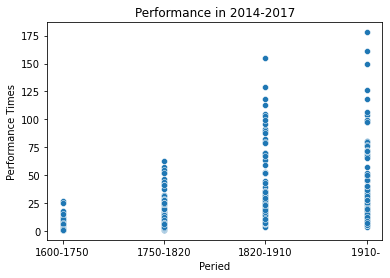

In [10]:
# Merge the three dataframes, removing rows with empty show times and periods.
df = [df14, df15, df16]
df = pd.concat(df)
df = df.dropna(subset=['Peried'])
df = df.dropna(subset=['FirstDate'])

# Calculate the number of performances by each orchestra for each period of the three years and plot a graph
df['Peried'] = df['Peried'].map({'Baroque': '1600-1750', 'Classical': '1750-1820', 'Romanticism': '1820-1910', 'Contemporary': '1910- '})
df_group = df.groupby(["Orchestra", "Peried"]).size().reset_index(name="PerformanceTime")

sns.scatterplot(x = "Peried", y = "PerformanceTime", data = df_group)
plt.title("Performance in 2014-2017")
plt.xlabel("Peried")
plt.ylabel("Performance Times")
plt.show()

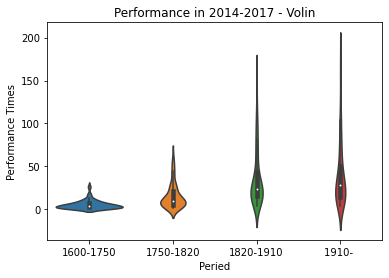

In [11]:
# Draw a violin diagram based on the above image
sns.violinplot(x = "Peried", y = "PerformanceTime", data = df_group)
plt.title("Performance in 2014-2017 - Volin")
plt.xlabel("Peried")
plt.ylabel("Performance Times")
plt.show()

As can be seen from the above figure, generally speaking, the American Symphony Orchestra chooses more contemporary works for repertoire, and the frequency of performance decreases according to the time of creation and the time since then.

Next, let's analyze the separate data for each symphony orchestra in these three years

In [12]:
# Integrate previous separate data for the four periods.
data_frames = [df_Baroque_merged, df_Classical_merged, df_Romanticism_merged, df_Contemporary_merged]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Orchestra'],
                                            how='outer'), data_frames)
df_merged = df_merged.dropna()

In [13]:
# Calculate the proportion of the number of performances performed by each symphony 
# orchestra for each period of the year to the number of performances throughout the year
# and show it as a percentage
cols14 = ['Baroque-2014','Classical-2014','Romanticism-2014','Contemporary-2014']
cols15 = ['Baroque-2015','Classical-2015','Romanticism-2015','Contemporary-2015']
cols16 = ['Baroque-2016','Classical-2016','Romanticism-2016','Contemporary-2016']
df_merged[cols14] = df_merged[cols14].div(df_merged[cols14].sum(axis=1), axis=0)
df_merged[cols15] = df_merged[cols15].div(df_merged[cols15].sum(axis=1), axis=0)
df_merged[cols16] = df_merged[cols16].div(df_merged[cols16].sum(axis=1), axis=0)

df_merged.style.format({
    'Baroque-2014': '{:,.2%}',
    'Classical-2014': '{:,.2%}',
    'Romanticism-2014': '{:,.2%}',
    'Contemporary-2014': '{:,.2%}',
    
    'Baroque-2015': '{:,.2%}',
    'Classical-2015': '{:,.2%}',
    'Romanticism-2015': '{:,.2%}',
    'Contemporary-2015': '{:,.2%}',
    
    'Baroque-2016': '{:,.2%}',
    'Classical-2016': '{:,.2%}',
    'Romanticism-2016': '{:,.2%}',
    'Contemporary-2016': '{:,.2%}',
})

,Orchestra,Baroque-2014,Baroque-2015,Baroque-2016,Classical-2014,Classical-2015,Classical-2016,Romanticism-2014,Romanticism-2015,Romanticism-2016,Contemporary-2014,Contemporary-2015,Contemporary-2016
0,Atlanta Symphony Orchestra,1.20%,1.47%,2.82%,16.87%,13.24%,12.68%,51.81%,54.41%,35.21%,30.12%,30.88%,49.30%
1,Baltimore Symphony Orchestra,3.80%,8.97%,2.27%,21.52%,15.38%,20.45%,37.97%,29.49%,32.95%,36.71%,46.15%,44.32%
2,Boston Symphony Orchestra,1.25%,2.53%,2.56%,20.00%,18.99%,15.38%,42.50%,35.44%,37.18%,36.25%,43.04%,44.87%
3,Chicago Symphony Orchestra,6.87%,3.48%,9.79%,9.16%,19.13%,16.08%,46.56%,33.04%,39.16%,37.40%,44.35%,34.97%
5,Cleveland Orchestra,2.94%,1.37%,6.93%,17.65%,15.07%,14.85%,38.24%,42.47%,32.67%,41.18%,41.10%,45.54%
6,Dallas Symphony Orchestra,11.32%,6.12%,2.94%,16.98%,10.20%,13.24%,33.96%,42.86%,45.59%,37.74%,40.82%,38.24%
7,Detroit Symphony Orchestra,1.09%,1.32%,7.41%,14.13%,14.47%,34.57%,42.39%,50.00%,16.05%,42.39%,34.21%,41.98%
8,Houston Symphony,4.08%,1.67%,3.45%,22.45%,11.67%,18.97%,40.82%,41.67%,39.66%,32.65%,45.00%,37.93%
9,Los Angeles Philharmonic,4.95%,3.28%,0.86%,15.84%,18.85%,13.79%,27.72%,23.77%,33.62%,51.49%,54.10%,51.72%
10,Milwaukee Symphony Orchestra,5.63%,1.72%,3.51%,14.08%,13.79%,19.30%,35.21%,41.38%,36.84%,45.07%,43.10%,40.35%


Of the 20 symphony orchestras given the full data. The above table is obtained by calculating (the total number of performances/number of performances of all works) in a certain period of each year. We can see the proportion of performances in each period of the year to the total performances. Overall, the detailed data can also be seen in line with the trend shown by the previous violinplot. The American Symphony Orchestra performs the least proportion of works from the Baroque period, followed by the classical period, and generally has the largest proportion of contemporary works.

It can be seen from the histogram that the number of performances for the works of the Baroque period is very random. There may be many performances in one year, but the number of performances in other years decreases sharply. No specific trend can be seen.

Text(0, 0.5, 'Performance ratio')

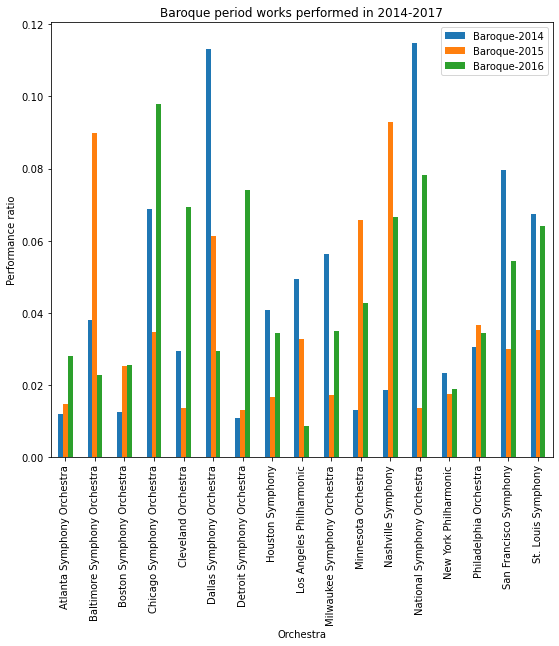

In [14]:
# Histogram of the annual share of each symphony orchestra in the Baroque period
ax = df_merged.plot(x="Orchestra", y=["Baroque-2014", "Baroque-2015", "Baroque-2016"], kind="bar", figsize=(9, 8), title='Baroque period works performed in 2014-2017')
ax.set_xlabel("Orchestra")
ax.set_ylabel("Performance ratio")

It can be seen from the following bar chart that the performance frequency of works in the classical period is much more stable than that in the baroque period. Except for individual symphony orchestras, the annual performance frequency is almost the same in proportion.

Text(0, 0.5, 'Performance ratio')

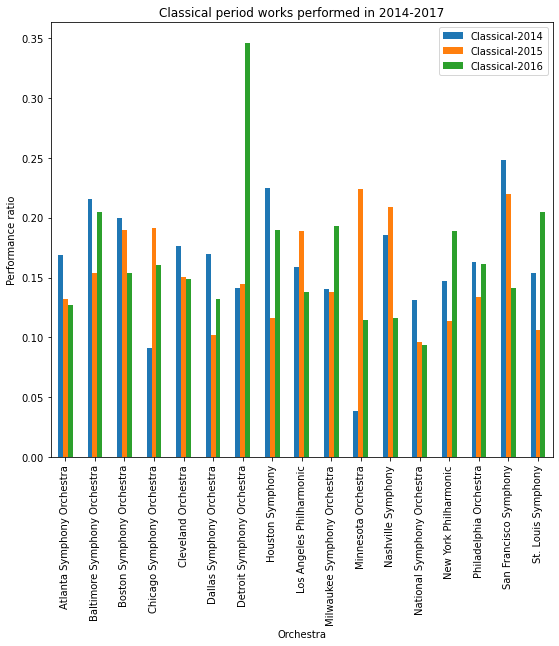

In [15]:
# Histogram of the annual share of each symphony orchestra in the Classical period
ax = df_merged.plot(x="Orchestra", y=["Classical-2014", "Classical-2015", "Classical-2016"], kind="bar", figsize=(9, 8), title='Classical period works performed in 2014-2017')
ax.set_xlabel("Orchestra")
ax.set_ylabel("Performance ratio")

The playing frequency of works of the Romantic period is significantly higher, and the frequency of playing is relatively stable compared to the Baroque period. In fact, during the Romantic period, music developed more widely, and the number of composers was much higher than in the previous two periods. Different from the musical style of the first two periods, the musical style, form and harmony of the Romantic period were varied. Therefore, the symphony orchestra has far more repertoire choices than the previous two periods, so it is inevitable that the selection ratio will exceed the previous two periods.

Text(0, 0.5, 'Performance ratio')

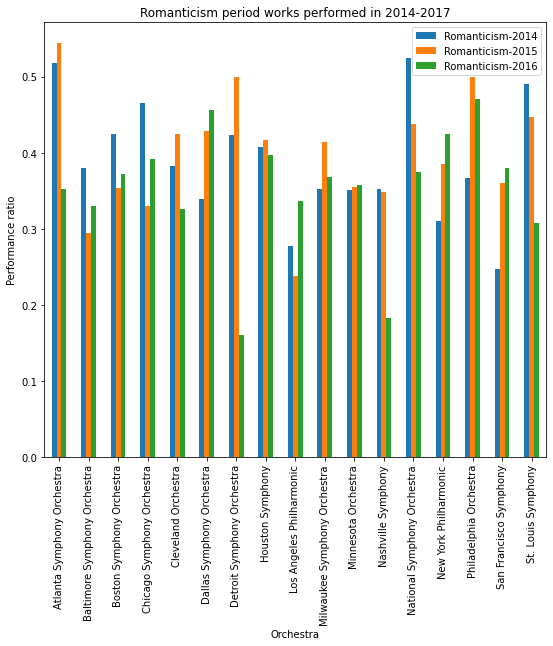

In [16]:
# Histogram of the annual share of each symphony orchestra in the Romanticism period
ax = df_merged.plot(x="Orchestra", y=["Romanticism-2014", "Romanticism-2015", "Romanticism-2016"], kind="bar", figsize=(9, 8), title='Romanticism period works performed in 2014-2017')
ax.set_xlabel("Orchestra")
ax.set_ylabel("Performance ratio")

We can see that the frequency of performances is the highest in the selection of contemporary works, and in the three years, most of the orchestras show a small growth trend.

Text(0, 0.5, 'Performance ratio')

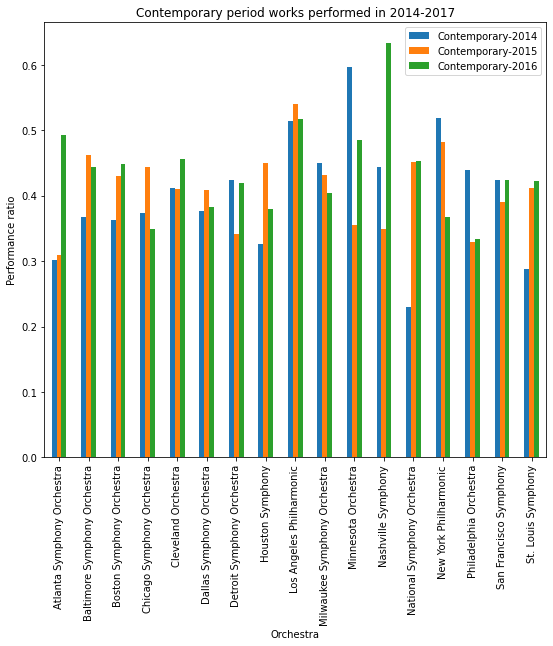

In [17]:
# Histogram of the annual share of each symphony orchestra in the Contemporary period
ax = df_merged.plot(x="Orchestra", y=["Contemporary-2014", "Contemporary-2015", "Contemporary-2016"], kind="bar", figsize=(9, 8), title='Contemporary period works performed in 2014-2017')
ax.set_xlabel("Orchestra")
ax.set_ylabel("Performance ratio")

It can be seen from the above data that American symphony orchestras prefer to choose to perform contemporary works. In the next part, I will focus on analyzing trends in contemporary works performed by American symphony orchestras.

## Part 4: Hypothesis Testing

It can be seen from the above analysis that in the three-year performance season from 2014 to 2017, the proportion of performing contemporary works is the highest, and the proportion of performances can be seen from the bar chart, and there is a slight increase in the proportion of performances each year. Under this premise, it is predicted that the proportion of American symphony orchestras performing contemporary works will remain stable and gradually increase in the future.

Next I integrated the performance data of contemporary works in a table.

In [18]:
# Extract data about contemporary works from the performance ratio table above and reframe it
df_merged = df_merged.melt(id_vars=["Orchestra"], 
        var_name="Year", 
        value_name="Value")
df_merged[["Perid", "Year"]] = df_merged["Year"].str.split('-', 1, expand=True)
df_merged1 = df_merged[(df_merged.Perid == "Contemporary")]
df_merged1.head()

,Orchestra,Year,Value,Perid
153,Atlanta Symphony Orchestra,2014,0.301205,Contemporary
154,Baltimore Symphony Orchestra,2014,0.367089,Contemporary
155,Boston Symphony Orchestra,2014,0.362500,Contemporary
156,Chicago Symphony Orchestra,2014,0.374046,Contemporary
157,Cleveland Orchestra,2014,0.411765,Contemporary


Through the scatterplot, it can be seen that the frequency of playing, whether it is the lowest proportion or the highest proportion, has steadily increased over the three years. There are individual outliers, but they do not affect the general trend.

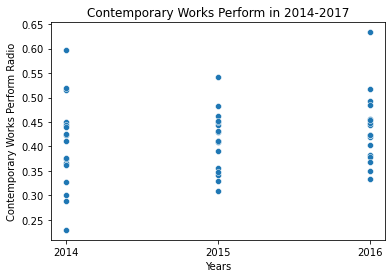

In [19]:
# Draw a scatterplot to reflect the performance data of contemporary works in the past three years
df_merged1 = df_merged[(df_merged.Perid == "Contemporary")]
sns.scatterplot(x = "Year", y = "Value", data = df_merged1)
plt.title("Contemporary Works Perform in 2014-2017")
plt.xlabel("Years")
plt.ylabel("Contemporary Works Perform Radio")
plt.show()

It can also be seen from the violinplot that the central area of the violin has a slight rise.

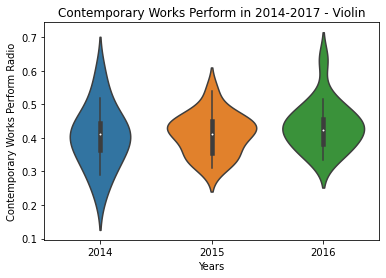

In [20]:
# Draw violinplot based on the above data
sns.violinplot(x = "Year", y = "Value", data = df_merged1)
plt.title("Contemporary Works Perform in 2014-2017 - Violin")
plt.xlabel("Years")
plt.ylabel("Contemporary Works Perform Radio")
plt.show()

Predicted by linear regression, we can see in the Residual plot that the performance frequency prediction for contemporary works is within a stable range.

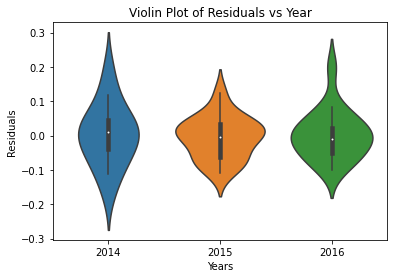

In [21]:
lm = linear_model.LinearRegression()

# Train the model using the training sets
X = df_merged1["Year"].to_numpy().reshape(-1, 1)
Y = df_merged1["Value"].to_numpy()
lm.fit(X, Y)

# Plot the residuals
df_merged1["Prediction"] = lm.predict(X)
df_merged1["Residual"] = list(Y - df_merged1["Prediction"])
sns.violinplot(x = "Year", y = "Residual", data = df_merged1)
plt.title("Violin Plot of Residuals vs Year")
plt.xlabel("Years")
plt.ylabel("Residuals")
plt.show()

From the above analysis, it can be seen that even though there is a slight increase in the frequency of performing contemporary works from the scatterplot, in the predicted results, the proportion of performing contemporary works remains stable.

## Part 5: Conclusion

I occasionally see concerns about the state of classical music, and that "classical music is dead" in some news and commentator reports. By consulting friends in the classical music industry, I learned that the performance of classical music is not ideal. Perhaps many people's impression of classical music is inseparable from the European court culture, and they think that classical music is outdated compared to popular music (including I once thought so). But in fact there are a large number of contemporary classical musicians still active on the stage and creating contemporary classical music.

It can be seen from the above analysis that in the actual classical music performance market, the symphony orchestra is not limited to the classical music works selected for performance in the early stage. Every year in the music season, while retaining the performance of classic classical music, they also give 30%-40%, or even more, to perform contemporary works. They have given a lot of space for modern works and more performance opportunities for more contemporary composers, promoting the development of contemporary classical music. Perhaps maintaining the frequency of contemporary compositions in this way (or increasing it a bit) can improve the status quo of classical music through long-term development, giving contemporary composers more room to grow, and attracting a wider audience to understand classical music.